In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data)
df["target"] = data.target
df.to_csv("data.csv", index=False)

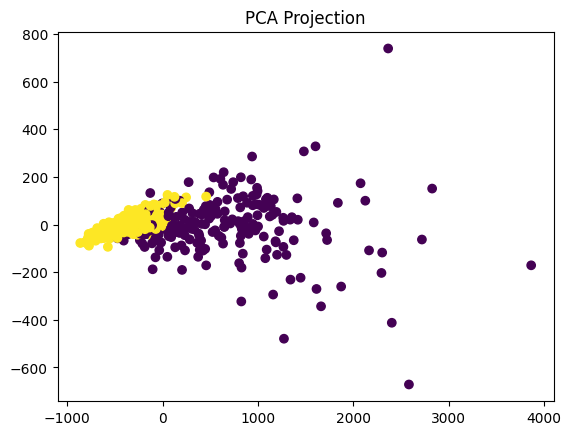

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_csv("data.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

plt.scatter(X2[:,0], X2[:,1], c=y)
plt.title("PCA Projection")
plt.show()

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000))
])

train_sizes, train_scores, val_scores = learning_curve(
    model,
    X, y,
    cv=5,
    scoring="f1",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

df.to_csv("learning_curve.csv", index=False)

In [6]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
X = data.data
y = data.target

model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000))
])

param_range = np.logspace(-4, 4, 10)

train_scores, val_scores = validation_curve(
    model,
    X, y,
    param_name="clf__C",
    param_range=param_range,
    cv=5,
    scoring="f1"
)

df = pd.DataFrame({
    "C": param_range,
    "train_score": np.mean(train_scores, axis=1),
    "val_score": np.mean(val_scores, axis=1)
})

import os
os.makedirs("outputs", exist_ok=True)
df.to_csv("outputs/validation_curve.csv", index=False)

print(df)

              C  train_score  val_score
0      0.000100     0.778628   0.778661
1      0.000774     0.917098   0.911025
2      0.005995     0.962565   0.956732
3      0.046416     0.981737   0.978023
4      0.359381     0.990258   0.983389
5      2.782559     0.991645   0.980473
6     21.544347     0.991640   0.972031
7    166.810054     0.994753   0.971836
8   1291.549665     0.996854   0.968726
9  10000.000000     0.998255   0.967623


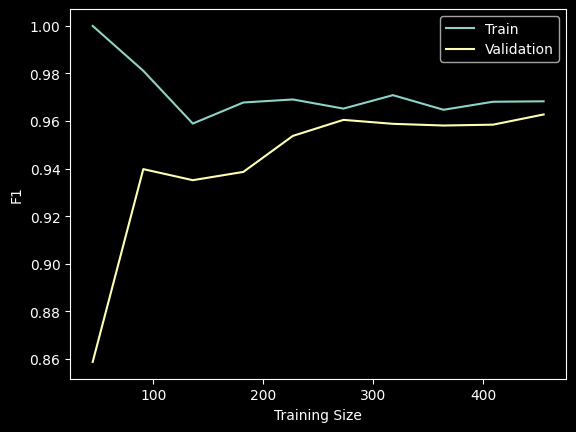

In [10]:
lc = pd.read_csv("learning_curve.csv")
plt.plot(lc["train_size"], lc["train_score"])
plt.plot(lc["train_size"], lc["val_score"])
plt.xlabel("Training Size")
plt.ylabel("F1")
plt.legend(["Train","Validation"])
plt.show()

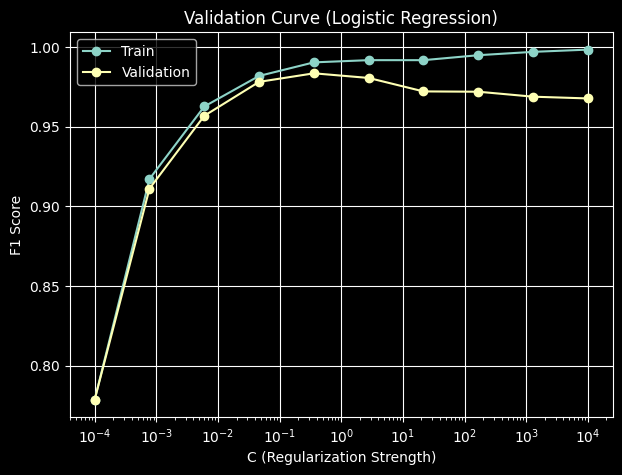

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

vc = pd.read_csv("outputs/validation_curve.csv")
plt.figure(figsize=(7,5))
plt.semilogx(vc["C"], vc["train_score"], marker='o')
plt.semilogx(vc["C"], vc["val_score"], marker='o')

plt.xlabel("C (Regularization Strength)")
plt.ylabel("F1 Score")
plt.legend(["Train", "Validation"])
plt.title("Validation Curve (Logistic Regression)")
plt.grid(True)
plt.show()